In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['ChurnP.csv']))

Saving ChurnP.csv to ChurnP (1).csv


In [14]:
df.shape

(10000, 12)

In [15]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [36]:
churn1= df[df['churn'] == 1]
churn0= df[df['churn'] == 0]

In [37]:
churn0['country'].value_counts()

France     4204
Spain      2064
Germany    1695
Name: country, dtype: int64

In [35]:
churn1['country'].value_counts()

Germany    814
France     810
Spain      413
Name: country, dtype: int64

In [6]:
#Dropping Variables with Many Levels - Customer_id- and Variable with variance 0 - Country-
df = df.drop(['customer_id' ], axis = 1)

In [7]:
df.shape

(10000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
#Converting some numerical variables to categorical variables to get them dummy
df['credit_card'] =  df['credit_card'].astype('category',copy=False)
df['active_member'] =  df['active_member'].astype('category',copy=False)
df['churn'] =  df['churn'].astype('category',copy=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   country           10000 non-null  object  
 2   gender            10000 non-null  object  
 3   age               10000 non-null  int64   
 4   tenure            10000 non-null  int64   
 5   balance           10000 non-null  float64 
 6   products_number   10000 non-null  int64   
 7   credit_card       10000 non-null  category
 8   active_member     10000 non-null  category
 9   estimated_salary  10000 non-null  float64 
 10  churn             10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


In [ ]:
df.describe()

,credit_score,age,tenure,balance,products_number,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
#get dummies for categorical variables
df1 = pd.get_dummies(df)
#df1 = pd.get_dummies(df, drop_first=True)

In [ ]:
df1.head()

,credit_score,age,tenure,balance,products_number,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1,churn_0,churn_1
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,0,1,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,1,0,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,0,1,1,0,0,1
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,0,1,0,1,1,0


<Axes: >

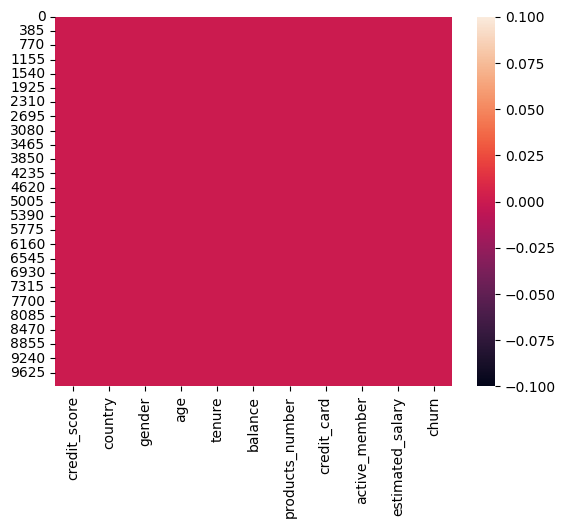

In [ ]:
sns.heatmap(df.isnull(), cbar=True)

In [42]:
t =df[['tenure','churn']]

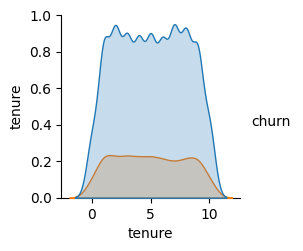

In [43]:
sns.pairplot(t, hue = 'churn')

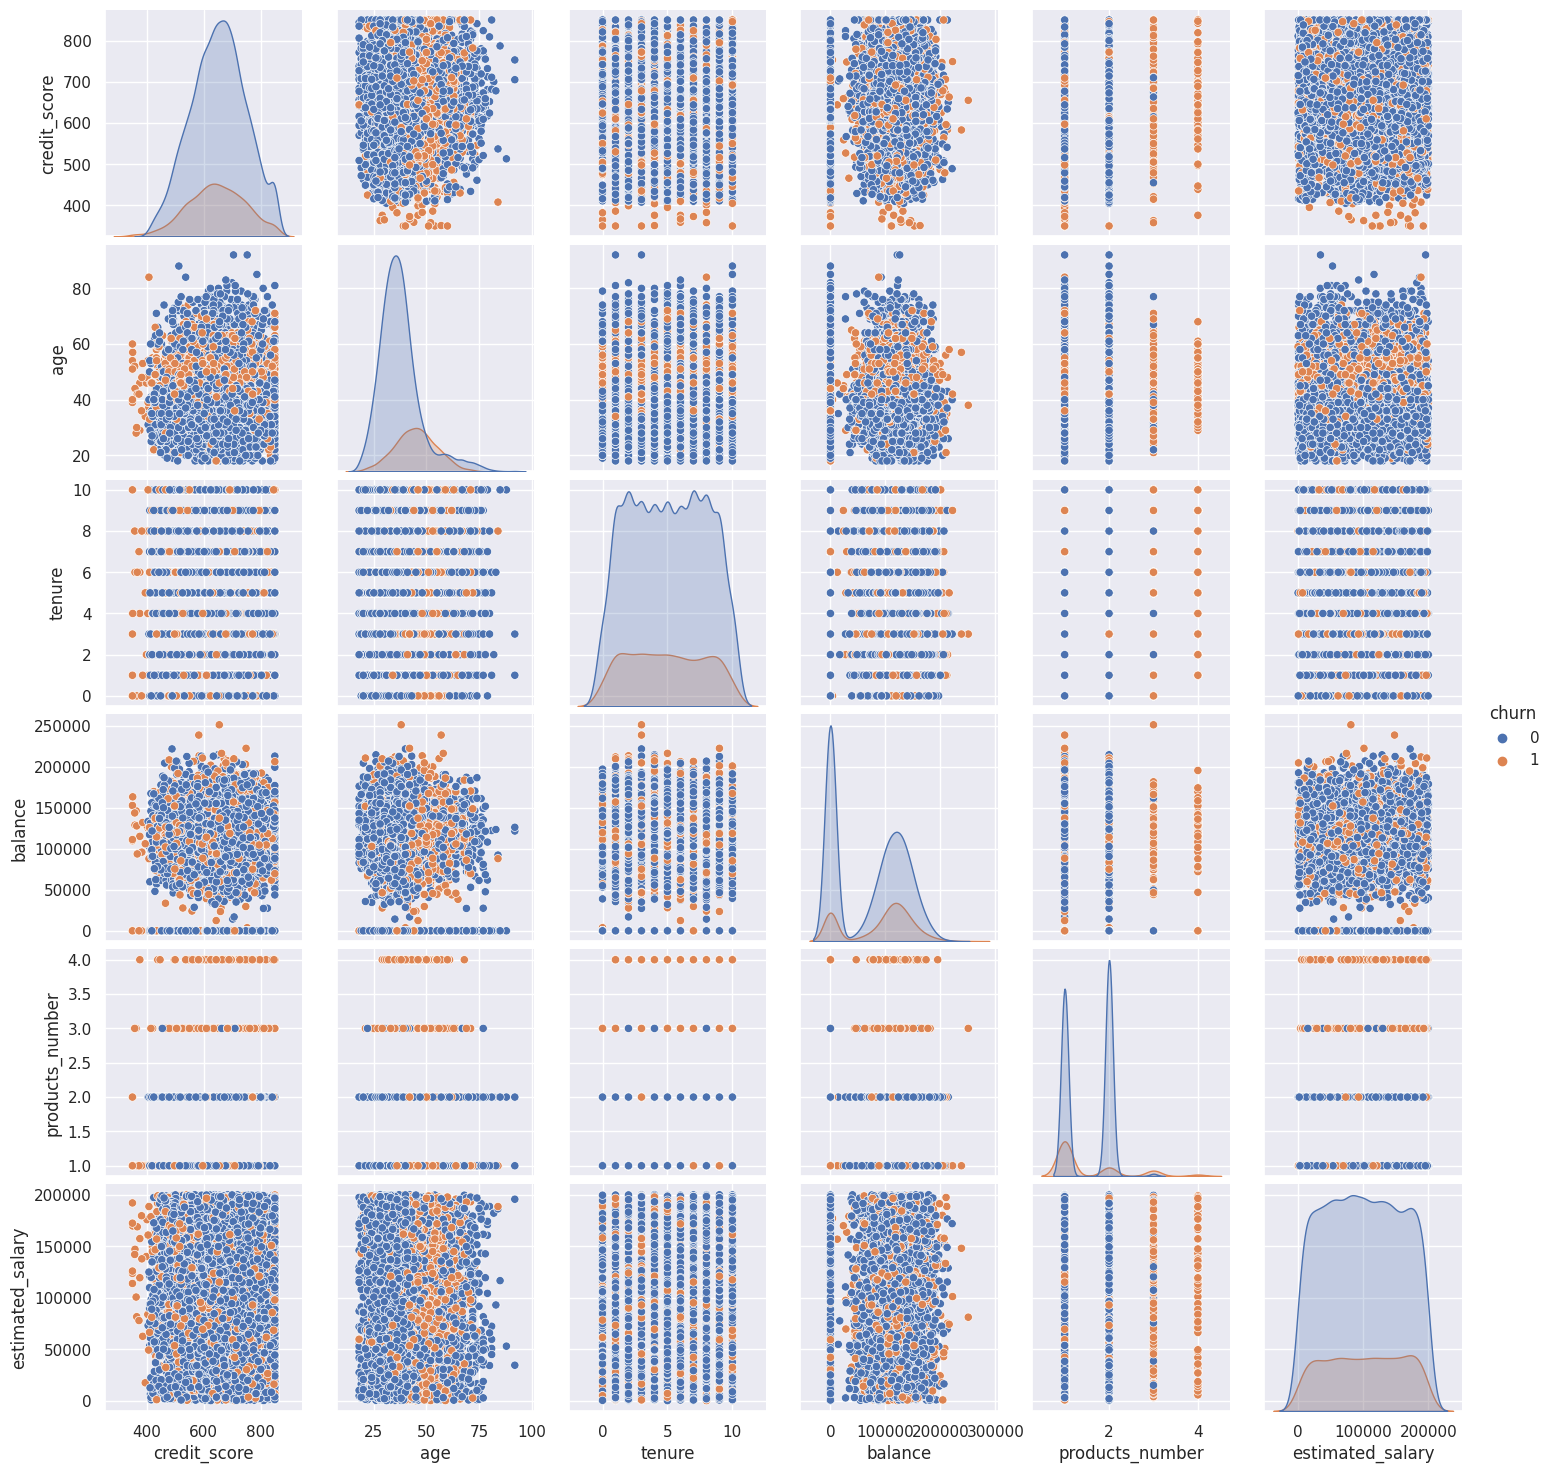

In [ ]:
sns.pairplot(df, hue = 'churn')

In [ ]:
df1.corr()['churn_1'].sort_values(ascending=False)

churn_1             1.000000
age                 0.285323
country_Germany     0.173488
active_member_0     0.156128
balance             0.118533
gender_Female       0.106512
estimated_salary    0.012097
credit_card_0       0.007138
credit_card_1      -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
country_Spain      -0.052667
country_France     -0.104955
gender_Male        -0.106512
active_member_1    -0.156128
Name: churn_1, dtype: float64

<ipython-input-55-9fc97907afd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5)


<Axes: >

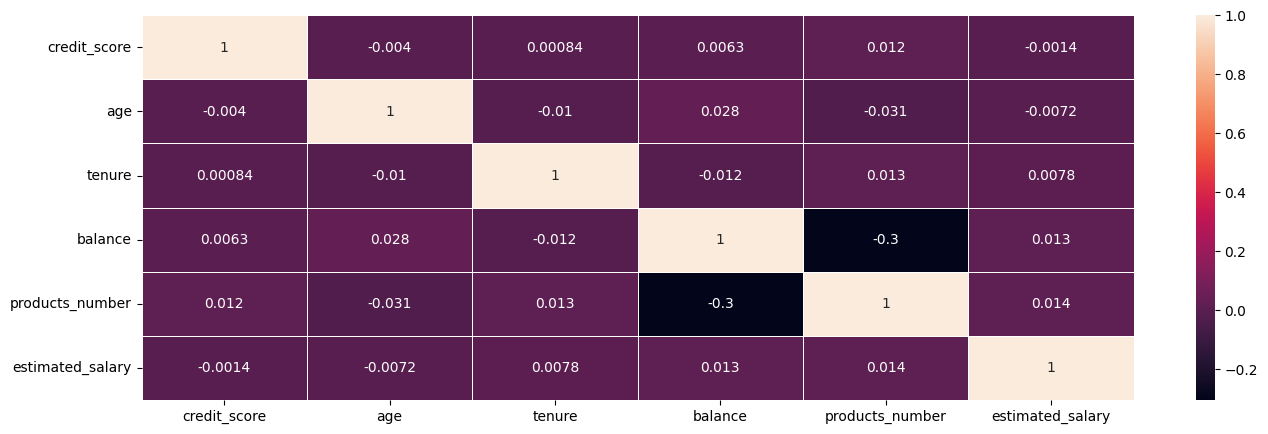

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

Visualization

Describing the data set

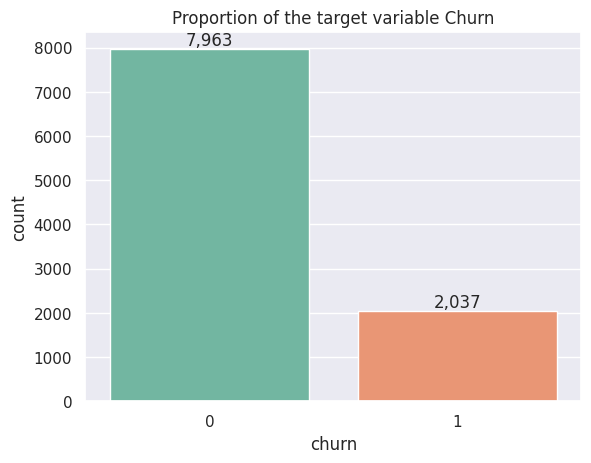

In [ ]:
sns.set(style="darkgrid") 
ax = sns.countplot(x='churn', data = df, palette = "Set2") 
#bar_container= ax.bar(df['churn'].value_counts().index, df['churn'].value_counts().values)
ax.bar_label(bar_container, fmt='{:,.0f}') #crear etiquetas en las barras
ax.set_title('Proportion of the target variable Churn')
plt.show()

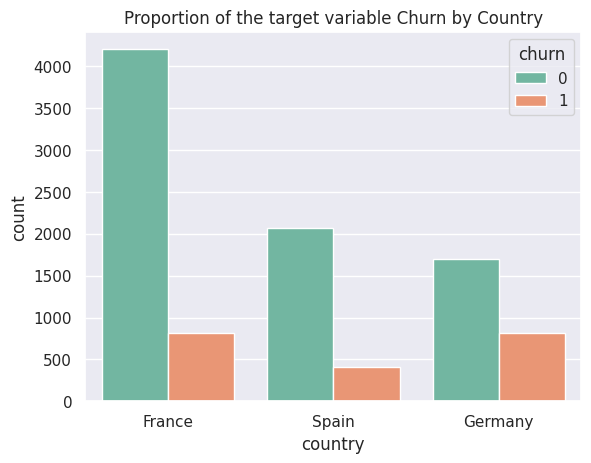

In [ ]:
sns.set(style="darkgrid") 
ax = sns.countplot(x='country', hue = 'churn', data = df, palette = "Set2")
ax.set_title('Proportion of the target variable Churn by Country')
plt.show()

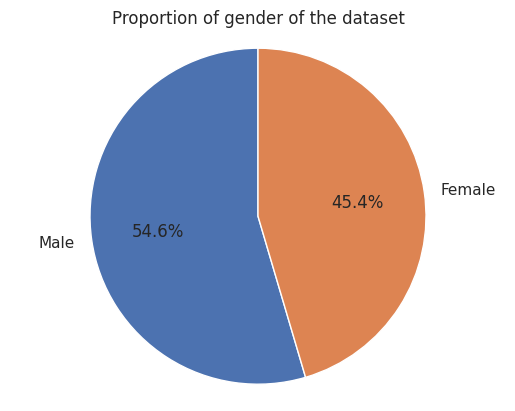

Male      5457
Female    4543
Name: gender, dtype: int64


In [ ]:
fig1, ax1 = plt.subplots() 
x = list(df['gender'].value_counts().index) 
y = list(df['gender'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Proportion of gender of the dataset')
plt.show()
print(df['gender'].value_counts())

In [ ]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [ ]:
churn= df[df['churn'] == 1]

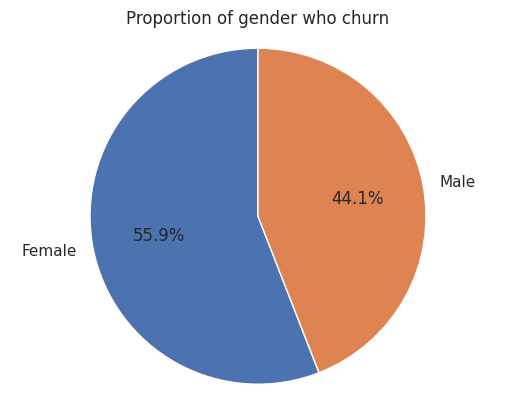

Female    1139
Male       898
Name: gender, dtype: int64


In [ ]:
fig1, ax1 = plt.subplots() 
x = list(churn['gender'].value_counts().index) 
y = list(churn['gender'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Proportion of gender who churn')
plt.show()
print(churn['gender'].value_counts())

Text(0.5, 1.0, 'Mean age of people in the dataset')

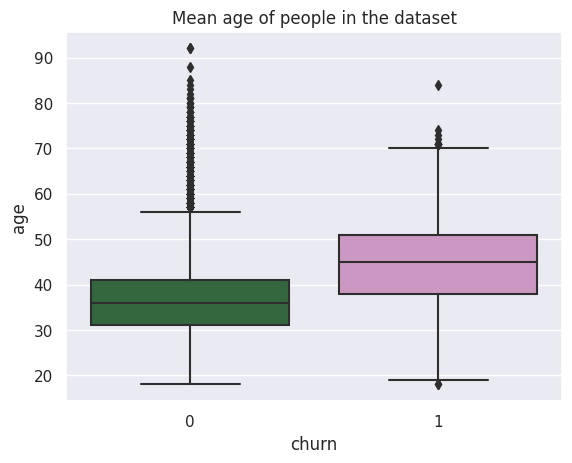

In [ ]:
ax = sns.boxplot(y = "age", x = 'churn', 
                 palette = "cubehelix", data = df)
ax.set_title('Mean age of people in the dataset')

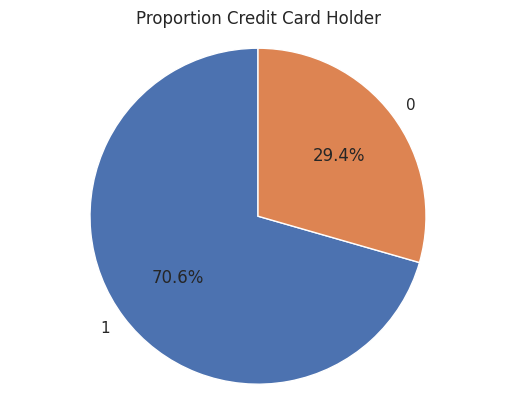

1    7055
0    2945
Name: credit_card, dtype: int64


In [ ]:
fig1, ax1 = plt.subplots() 
x = list(df['credit_card'].value_counts().index) 
y = list(df['credit_card'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Proportion Credit Card Holder')
plt.show()
print(df['credit_card'].value_counts())

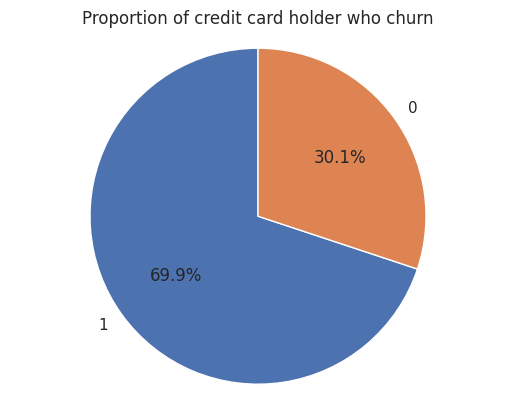

1    1424
0     613
Name: credit_card, dtype: int64


In [ ]:
fig1, ax1 = plt.subplots() 
x = list(churn['credit_card'].value_counts().index) 
y = list(churn['credit_card'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Proportion of credit card holder who churn')
plt.show()
print(churn['credit_card'].value_counts())

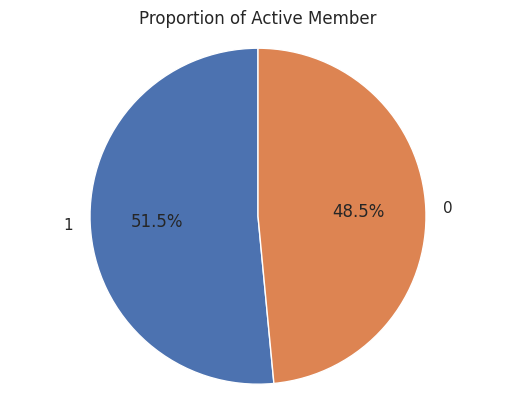

1    7055
0    2945
Name: credit_card, dtype: int64


In [ ]:
fig1, ax1 = plt.subplots() 
x = list(df['active_member'].value_counts().index) 
y = list(df['active_member'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Proportion of Active Member')
plt.show()
print(df['credit_card'].value_counts())

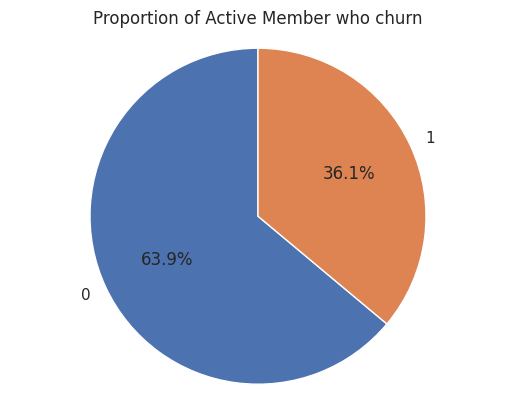

0    1302
1     735
Name: active_member, dtype: int64


In [ ]:
fig1, ax1 = plt.subplots() 
x = list(churn['active_member'].value_counts().index) 
y = list(churn['active_member'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Proportion of Active Member who churn')
plt.show()
print(churn['active_member'].value_counts())

<ipython-input-111-cecc9a5c1c11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['balance'], bins = 15)


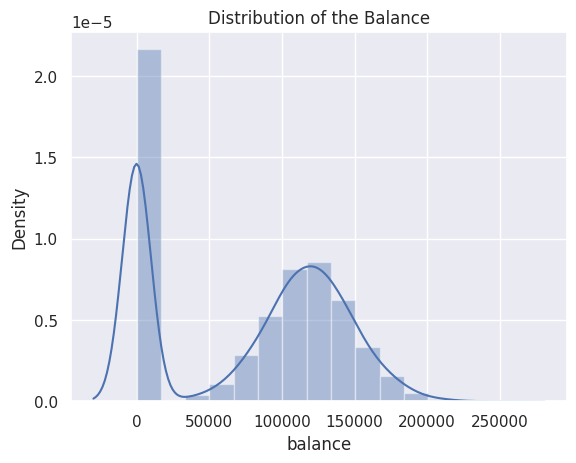

Average Balance = 76485.889288


In [ ]:
ax = sns.distplot(df['balance'], bins = 15) 
ax.set_title('Distribution of the Balance')
plt.show()
print('Average Balance =', df['balance'].mean())

<ipython-input-123-882154420225>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(churn['balance'], bins = 15)


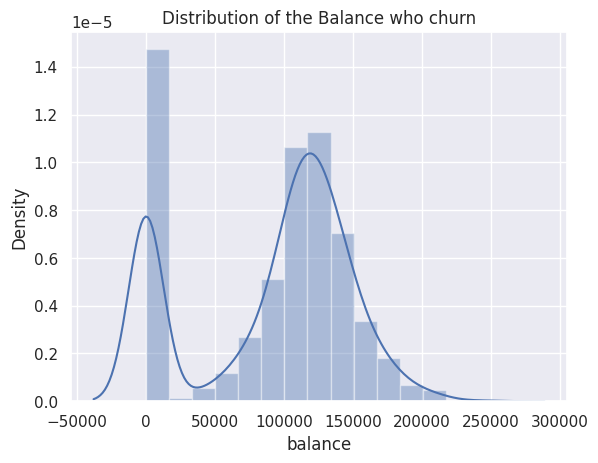

Average Balance = 91108.53933726068


In [ ]:
ax = sns.distplot(churn['balance'], bins = 15) 
ax.set_title('Distribution of the Balance who churn')
plt.show()
print('Average Balance =', churn['balance'].mean())

<ipython-input-113-3b5af0a9febb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['estimated_salary'], bins = 15)


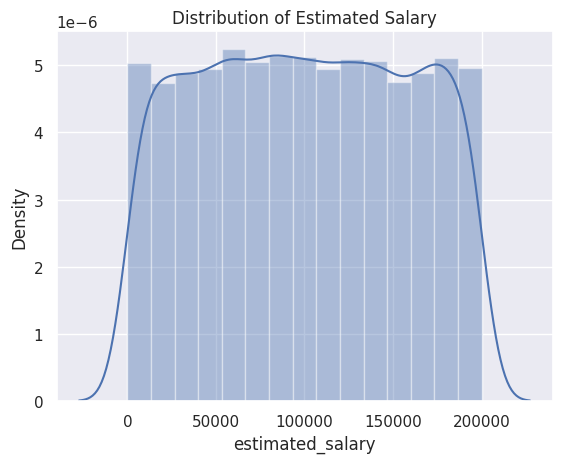

Average Estimated Salary = 100090.239881


In [ ]:
ax = sns.distplot(df['estimated_salary'], bins = 15) 
ax.set_title('Distribution of Estimated Salary')
plt.show()
print('Average Estimated Salary =', df['estimated_salary'].mean())

<ipython-input-124-776c7c5cb564>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(churn['estimated_salary'], bins = 15)


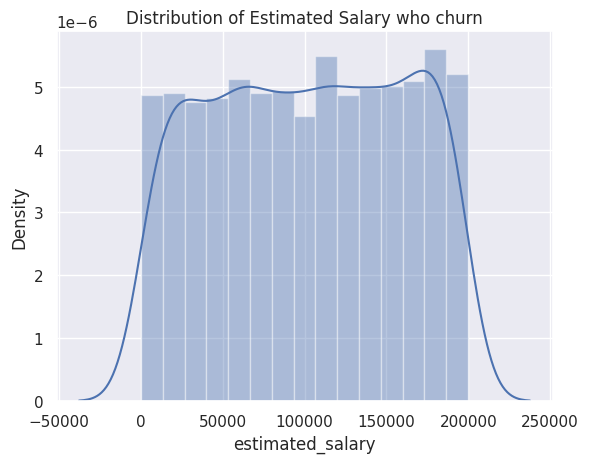

Average Estimated Salary = 101465.67753068237


In [ ]:
ax = sns.distplot(churn['estimated_salary'], bins = 15) 
ax.set_title('Distribution of Estimated Salary who churn')
plt.show()
print('Average Estimated Salary =', churn['estimated_salary'].mean())

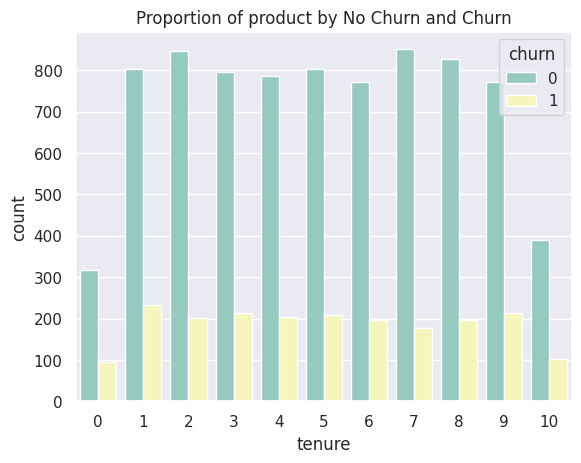

In [ ]:
sns.set(style="darkgrid") 
ax = sns.countplot(x='tenure', hue = 'churn', data = df, palette = "Set3")
ax.set_title('Proportion of product by No Churn and Churn')
plt.show()

Text(0.5, 1.0, 'Average Credit Score of the data set No Churn and Churn')

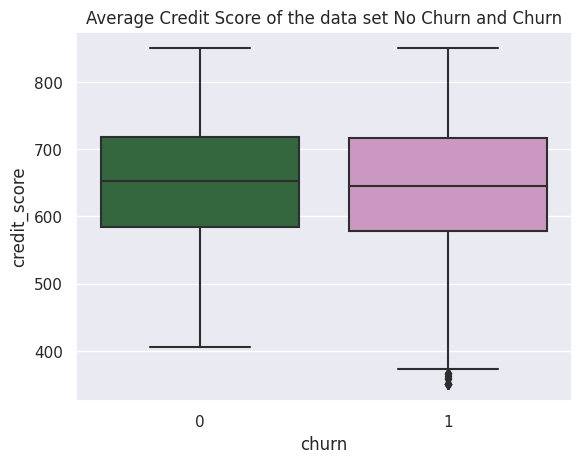

In [ ]:
ax = sns.boxplot(y = "credit_score", x = 'churn', 
                 palette = "cubehelix", data = df)
ax.set_title('Average Credit Score of the data set No Churn and Churn')

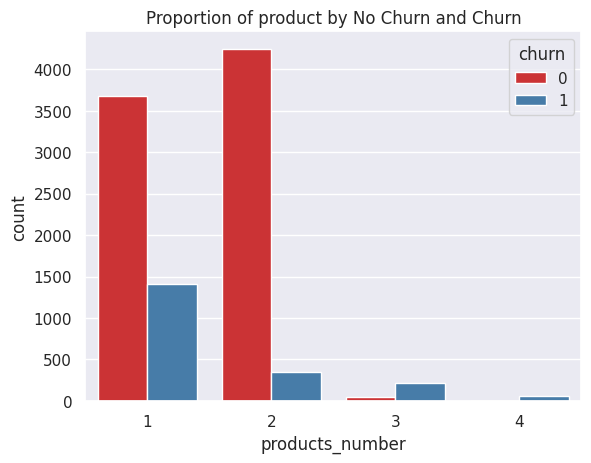

In [ ]:
sns.set(style="darkgrid") 
ax = sns.countplot(x='products_number', hue = 'churn', data = df, palette = "Set1")
ax.set_title('Proportion of product by No Churn and Churn')
plt.show()

In [ ]:
df1=df1.drop('churn_0', axis=1)

In [ ]:
df1.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'estimated_salary', 'country_France', 'country_Germany',
       'country_Spain', 'gender_Female', 'gender_Male', 'credit_card_0',
       'credit_card_1', 'active_member_0', 'active_member_1', 'churn_1'],
      dtype='object')

In [ ]:
#logistic regression v1

scaler = MinMaxScaler()
XS = scaler.fit_transform(df1)
X1 = pd.DataFrame(XS, columns= df1.columns)

X = X1.drop('churn_1', axis = 1)
y = X1['churn_1']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(train_X, train_y)
y_pred= logmodel.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))
print('ROC AUC VALUE: ', roc_auc_score(test_y,logmodel.predict_proba(test_X)[:,1]))
logit_model=sm.Logit(train_y, train_X)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

[[2309   64]
 [ 498  129]]
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      2373
         1.0       0.67      0.21      0.31       627

    accuracy                           0.81      3000
   macro avg       0.75      0.59      0.60      3000
weighted avg       0.79      0.81      0.77      3000

ROC AUC VALUE:  0.7662021774737191
Optimization terminated successfully.
         Current function value: 0.426716
         Iterations 6
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.151      
Dependent Variable:      churn_1              AIC:                  5998.0230  
Date:                    2023-04-20 22:18     BIC:                  6080.2670  
No. Observations:        7000                 Log-Likelihood:       -2987.0    
Df Model:                11                   LL-Null:              -3516.6    
Df Residuals:            6988                 LLR p-value:    

In [ ]:
#logistic regression v2 dropping variables
df2 = df1[['credit_score', 'tenure' ,'age','products_number', 'gender_Female','credit_card_0','active_member_0', 'churn_1']]

scaler = MinMaxScaler()
XS = scaler.fit_transform(df2)
X1 = pd.DataFrame(XS, columns= df2.columns)

X = X1.drop('churn_1', axis = 1)
y = X1['churn_1']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
logmodel1 = LogisticRegression(solver = 'liblinear')
logmodel1.fit(train_X, train_y)
y_pred= logmodel1.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))
print('ROC AUC VALUE: ', roc_auc_score(test_y,logmodel1.predict_proba(test_X)[:,1]))
logit_model=sm.Logit(train_y, train_X)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

[[2327   46]
 [ 537   90]]
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      2373
         1.0       0.66      0.14      0.24       627

    accuracy                           0.81      3000
   macro avg       0.74      0.56      0.56      3000
weighted avg       0.78      0.81      0.75      3000

ROC AUC VALUE:  0.7425455567048488
Optimization terminated successfully.
         Current function value: 0.485751
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.033     
Dependent Variable: churn_1          AIC:              6814.5190 
Date:               2023-04-20 23:03 BIC:              6862.4946 
No. Observations:   7000             Log-Likelihood:   -3400.3   
Df Model:           6                LL-Null:          -3516.6   
Df Residuals:       6993             LLR p-value:      1.9805e-47
Converged:          1.0000           Scale:            1.0000    
No. Ite

In [ ]:
#kNN model

scaler = MinMaxScaler()
XS = scaler.fit_transform(df1)
X1 = pd.DataFrame(XS, columns= df1.columns)

X = X1.drop('churn_1', axis = 1)
y = X1['churn_1']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean') #existen tres formas de medir las distancias una de ella es eucliden, manhattan, minkowski
knn.fit(train_X, train_y)

pred_y = knn.predict(test_X)

print(confusion_matrix(test_y,pred_y ))
print(classification_report(test_y,pred_y ))
print('ROC AUC VALUE: ', roc_auc_score(test_y,knn.predict_proba(test_X)[:,1]))

[[2300   73]
 [ 518  109]]
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      2373
         1.0       0.60      0.17      0.27       627

    accuracy                           0.80      3000
   macro avg       0.71      0.57      0.58      3000
weighted avg       0.77      0.80      0.76      3000

ROC AUC VALUE:  0.7532642278799708


In [ ]:
#kNN (optimize k)

maxK=100
cv_scores = []
for K in range(1,maxK):
  knn = KNeighborsClassifier(n_neighbors=K)
  scores = cross_val_score(knn,train_X,train_y.values.ravel(),cv = 5,scoring = "roc_auc")
  cv_scores.append(scores.mean())
  selected_k=cv_scores.index(max(cv_scores))+1

print('Optimal k: ', cv_scores.index(max(cv_scores))+1)

Optimal k:  15


In [ ]:
#ramdon forest

df3 = df1
X = df3.drop('churn_1', axis = 1)
y = df3['churn_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print('ROC AUC VALUE: ', roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1]))

[[2343   30]
 [ 436  191]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2373
           1       0.86      0.30      0.45       627

    accuracy                           0.84      3000
   macro avg       0.85      0.65      0.68      3000
weighted avg       0.85      0.84      0.81      3000

ROC AUC VALUE:  0.8441978504856941


In [ ]:
#Boosted Tree

df4 = df1
X = df4.drop('churn_1', axis = 1)
y = df4['churn_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_bt))
print(classification_report(y_test,y_pred_bt))
print('ROC AUC:',roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1]))

[[2274   99]
 [ 337  290]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.75      0.46      0.57       627

    accuracy                           0.85      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000

ROC AUC: 0.8432908498115765


In [ ]:
#Naive Bayes

df5 = df1
X = df5.drop('churn_1', axis = 1)
y = df5['churn_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

churn_nb = MultinomialNB(alpha=0.01)
churn_nb.fit(X_train, y_train) 

y_pred = churn_nb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('ROC AUC:',roc_auc_score(y_test, churn_nb.predict_proba(X_test)[:,1]))


[[1301 1072]
 [ 295  332]]
              precision    recall  f1-score   support

           0       0.82      0.55      0.66      2373
           1       0.24      0.53      0.33       627

    accuracy                           0.54      3000
   macro avg       0.53      0.54      0.49      3000
weighted avg       0.69      0.54      0.59      3000

ROC AUC: 0.538788981033974


In [ ]:
#ANN
scaler = MinMaxScaler()
XS = scaler.fit_transform(df1)
X1 = pd.DataFrame(XS, columns= df1.columns)

X = X1.drop('churn_1', axis = 1)
y = X1['churn_1']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.30,random_state=1)

MLPC_model = MLPClassifier(hidden_layer_sizes=6, activation='logistic', solver='adam', random_state=1)
MLPC_model.fit(X_train1, y_train1)
y_pred_mlpc1 = MLPC_model.predict(X_test1)

print(confusion_matrix(y_test1,y_pred_mlpc1))
print(classification_report(y_test1,y_pred_mlpc1))
print('ROC AUC VALUE: ', roc_auc_score(y_test1, MLPC_model.predict_proba(X_test1)[:,1]))


[[2314   59]
 [ 496  131]]
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      2373
         1.0       0.69      0.21      0.32       627

    accuracy                           0.81      3000
   macro avg       0.76      0.59      0.61      3000
weighted avg       0.80      0.81      0.77      3000

ROC AUC VALUE:  0.7766970389234014


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
min_hidden_layer_size = 12
max_hidden_layer_size = 50
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,1):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='adam', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())
    selected_N=cv_scores.index(max(cv_scores))+6
print('Optimal N: ', cv_scores.index(max(cv_scores))+6)

Optimal N:  6


In [ ]:
#Keras
scaler = MinMaxScaler()
XS = scaler.fit_transform(df1)
X1 = pd.DataFrame(XS, columns= df1.columns)

X = X1.drop('churn_1', axis = 1)
y = X1['churn_1']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

model = Sequential()

model.add(Dense(units=15,activation='relu')) #layer 1
model.add(Dropout(0.5))
model.add(Dense(units=7,activation='relu')) #layer 2
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid')) #output

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.55      0.66      2373
         1.0       0.24      0.53      0.33       627

    accuracy                           0.54      3000
   macro avg       0.53      0.54      0.49      3000
weighted avg       0.69      0.54      0.59      3000

[[1301 1072]
 [ 295  332]]
94/94 [==============================] - 1s 2ms/step
ROC AUC:  0.5372912033368484


Epoch 1/200
55/55 [==============================] - 2s 8ms/step - loss: 18458.6406 - val_loss: 4056.6814
Epoch 2/200
55/55 [==============================] - 0s 3ms/step - loss: 8357.2793 - val_loss: 373.3294
Epoch 3/200
55/55 [==============================] - 0s 4ms/step - loss: 4680.7812 - val_loss: 205.8252
Epoch 4/200
55/55 [==============================] - 0s 4ms/step - loss: 3227.8962 - val_loss: 96.3583
Epoch 5/200
55/55 [==============================] - 0s 4ms/step - loss: 2320.3186 - val_loss: 0.6946
Epoch 6/200
55/55 [==============================] - 0s 3ms/step - loss: 1864.4454 - val_loss: 0.6523
Epoch 7/200
55/55 [==============================] - 0s 4ms/step - loss: 1321.7222 - val_loss: 0.6258
Epoch 8/200
55/55 [==============================] - 0s 4ms/step - loss: 1001.4906 - val_loss: 0.6052
Epoch 9/200
55/55 [==============================] - 0s 3ms/step - loss: 720.1884 - val_loss: 0.5960
Epoch 10/200
55/55 [==============================] - 0s 4ms/step - loss: 

<Axes: >

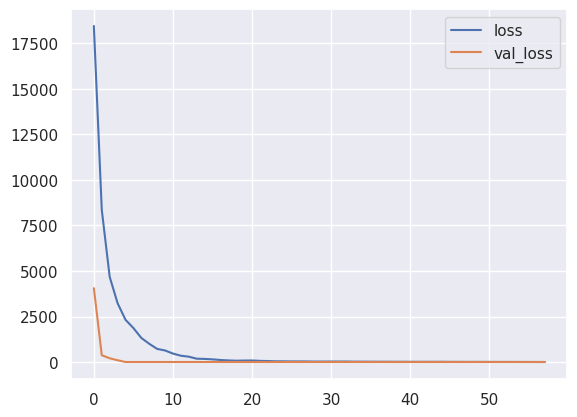

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

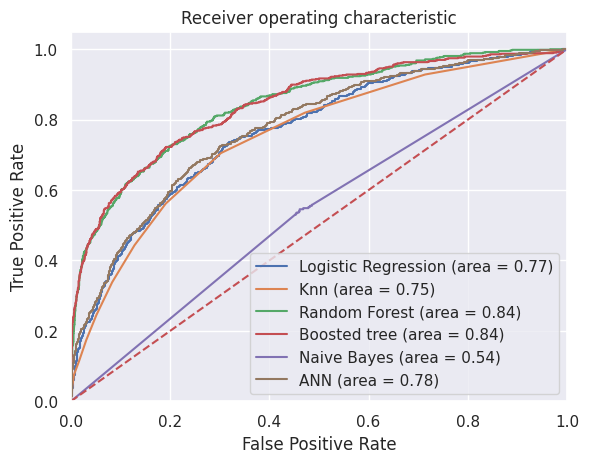

In [ ]:
# Logistic Regression
logit_roc_auc = roc_auc_score(test_y,logmodel.predict_proba(test_X)[:,1])
logit_fpr, logit_tpr, logit_thresholds = roc_curve(test_y, logmodel.predict_proba(test_X)[:,1])

#kNN
knn_roc_auc = roc_auc_score(test_y, knn.predict_proba(test_X)[:,1])
knn_fpr, knn_tpr, knn_thresholds= roc_curve(test_y, knn.predict_proba(test_X)[:,1])

# Random Forest 
rf_roc_auc = roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

#Naive Bayes
nb_roc_auc = roc_auc_score(y_test, churn_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, churn_nb.predict_proba(X_test)[:,1])

#ANN
ann_roc_auc = roc_auc_score(y_test1, MLPC_model.predict_proba(X_test1)[:,1])
ann_fpr, ann_tpr, ann_thresholds = roc_curve(y_test1, MLPC_model.predict_proba(X_test1)[:,1])

#Keras
#krs_roc_auc = roc_auc_score(y_test,model.predict(X_test))
#krs_fpr, krs_tpr, krs_threshold = roc_auc_score(y_test,model.predict(X_test))


plt.figure()
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='Knn (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(ann_fpr, ann_tpr, label='ANN (area = %0.2f)' % ann_roc_auc)
#plt.plot(ann_fpr, ann_tpr, label='Keras (area = %0.2f)' % krs_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()